In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread("test2.jpg")

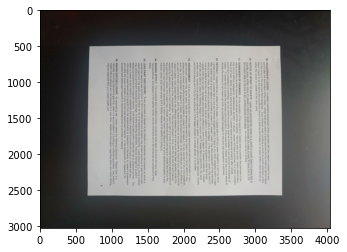

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
image.shape

(3024, 4032, 3)

In [5]:
if image.shape[0] < image.shape[1]:
    image = cv2.rotate(image, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)

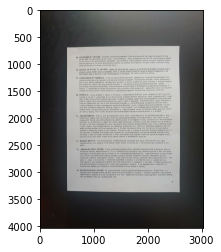

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

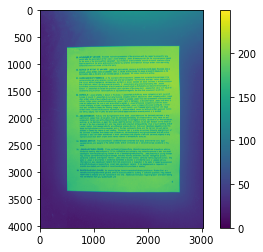

In [8]:
plt.imshow(gray)
plt.colorbar()
plt.show()

In [9]:
gray.shape

(4032, 3024)

In [10]:
src = gray
#percent by which the image is resized
scale = 0.1

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale)
height = int(src.shape[0] * scale)

# dsize
dsize = (width, height)

# resize image
reduced = cv2.resize(src, dsize) - 127.5
reduced.shape

(403, 302)

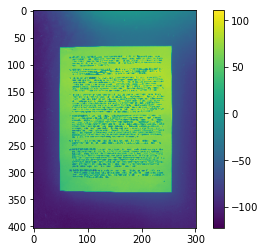

In [11]:
plt.imshow(reduced)
plt.colorbar()
plt.show()

In [12]:
reduced.shape

(403, 302)

In [13]:
a = int( 0.03 * reduced.shape[1])
print(f"a = {a}")
zeros = np.zeros(shape=(a, a))
ones = np.ones(shape=(a, a))
ll = 1/a**2/6*np.concatenate([
        np.concatenate((-ones, -ones), axis=1),
        np.concatenate((-ones, 3*ones), axis=1)])
i_half_max = int(reduced.shape[0]/2)+1
j_half_max = int(reduced.shape[1]/2)+1
ll_im = cv2.filter2D(reduced[:i_half_max,:j_half_max], -1, ll)
lh = 1/a**2/6*np.concatenate([
        np.concatenate((-ones, -ones), axis=1),
        np.concatenate((3*ones, -ones), axis=1)])
lh_im = cv2.filter2D(reduced[:i_half_max,j_half_max:], -1, lh)
hh = 1/a**2/6*np.concatenate([
        np.concatenate((3*ones, -ones), axis=1),
        np.concatenate((-ones, -ones), axis=1)])
hh_im = cv2.filter2D(reduced[i_half_max:,j_half_max:], -1, hh)
hl = 1/a**2/6*np.concatenate([
        np.concatenate((-ones, 3*ones), axis=1),
        np.concatenate((-ones, -ones), axis=1)])
hl_im = cv2.filter2D(reduced[i_half_max:,:j_half_max], -1, hl)
ijs0 = [np.unravel_index(np.argmax(xx_im), xx_im.shape) for xx_im in [ll_im, lh_im, hh_im, hl_im]]
didjs = [(0,0), (0,j_half_max), (i_half_max, j_half_max), (i_half_max, 0)]
ijs = []
xys = []
for ij, didj in zip(ijs0, didjs):
    i,j = ij
    di,dj = didj
    ri, rj = i+di, j+dj
    ijs.append(np.array([ri, rj]))
    xys.append(np.array([rj, ri]))
    

a = 9


In [14]:
ctr = np.array(xys).reshape((-1,1,2)).astype(np.int32)
ctr_im = cv2.drawContours(reduced,[ctr],0,(255,255,255),1)

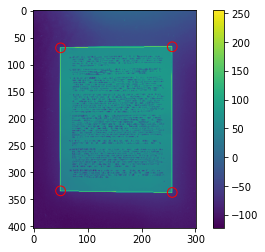

In [15]:
fig, ax = plt.subplots()
plt.imshow(ctr_im)
for x, y in xys:
    circle1 = plt.Circle((x, y), a, color='red', fill=False)
    ax.add_patch(circle1)
plt.colorbar()
plt.show()

In [16]:
scalex = reduced.shape[1]/image.shape[1]
scaley = reduced.shape[0]/image.shape[0]
xys0 = [np.array([int(x/scalex), int(y/scaley)]) for x, y in xys]
ctr0 = np.array(xys0).reshape((-1,1,2)).astype(np.int32)
ctr0_im = cv2.drawContours(image.copy(),[ctr0],0,(0,255,0),20)

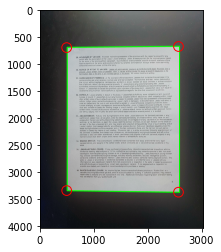

In [18]:
fig, ax = plt.subplots()
plt.imshow(ctr0_im)
for x, y in xys0:
    circle1 = plt.Circle((x, y), a/scale, color='red', fill=False)
    ax.add_patch(circle1)
plt.show()

In [19]:
# width = max(np.linalg.norm(xys0[0] - xys0[1]),
#                  np.linalg.norm(xys0[2] - xys0[3]))
height = max(np.linalg.norm(xys0[1] - xys0[2]),
            np.linalg.norm(xys0[3] - xys0[0]))


width = height*8.5/11
rect = np.array([[0, 0],
                [0, width],
                [height, width],
                [height, 0]], np.float32)
xys_fl = np.array(xys0).astype(np.float32)

M = cv2.getPerspectiveTransform(xys_fl, rect)

res = cv2.warpPerspective(image, M, (int(height), int(width)))
res = cv2.flip(res, 0)
res = cv2.rotate(res, cv2.cv2.ROTATE_90_CLOCKWISE)


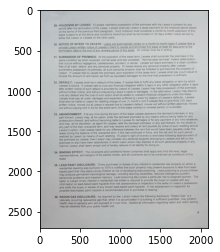

In [20]:
plt.imshow(res)
plt.show()

In [21]:
cv2.imwrite('res.jpg', res)

True